# Basic graph operations with NetworkX
[documentation](https://networkx.github.io/)

In [144]:
import networkx as nx

## Create and modify

In [145]:
# start graph
G = nx.Graph(A = 5)

In [146]:
# add nodes
## single node with attribute
G.add_node(1, time='5pm')
## list of nodes
G.add_nodes_from([2, 3])
## string of nodes
G.add_nodes_from('networkx')

In [147]:
# add edges
## single
G.add_edge(1, 2) # connect node 1 and node 2
## multiple
G.add_edges_from([(1,2), (1,3), ('n',3), ('x','n')])
## edges with weight
G.add_weighted_edges_from([(2,3, .65)])

In [148]:
# remove
## nodes
G.remove_nodes_from('work')
## edges
G.remove_edges_from([('n','x')])

## Subsetting and working with the class iterators

In [149]:
## get edges from a subset of list of nodes
print('Subset edges:')
G.edges([2,'n'])

Subset edges:


EdgeDataView([(2, 1), (2, 3), ('n', 3)])

In [150]:
## get degree from a subset of all nodes
print('Subset degree:')
G.degree([2,'n'])

Subset degree:


DegreeView({2: 2, 'n': 1})

In [151]:
# change attributes of edges
G['n'][3]['color'] = 'blue'
G.edges[1,2]['color'] = 'yellow'

In [152]:
# access attributes of adjacent nodes
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        print(n, nbr, eattr)

1 2 {'color': 'yellow'}
1 3 {}
2 1 {'color': 'yellow'}
2 3 {'weight': 0.65}
3 1 {}
3 n {'color': 'blue'}
3 2 {'weight': 0.65}
n 3 {'color': 'blue'}


In [153]:
# access edges attributes
for (u, v, weight) in G.edges.data('weight'):
    print(u, v, weight)

1 2 None
1 3 None
2 3 0.65
3 n None


## Get info

In [126]:
print('Graph attributes:\n',G.graph)
print('Node attributes:\n',G.nodes.data())
print('No. nodes:', G.number_of_nodes(), '\nNo. edges:', G.number_of_edges())

print('Nodes:\n',G.nodes())
print('Edges:\n',G.edges())

print('Adjacency:\n',G.adj) # shows adjacent nodes and their edges' attributes
print('Neighbors:\n',list(G.neighbors(1))) # get neighbors from node 1
print('Degree:\n',G.degree)


print('')

Graph attributes:
 {'A': 5}
Node attributes:
 [(1, {'time': '5pm'}), (2, {}), (3, {}), ('n', {}), ('e', {}), ('t', {}), ('x', {})]
No. nodes: 7 
No. edges: 4
Nodes:
 [1, 2, 3, 'n', 'e', 't', 'x']
Edges:
 [(1, 2), (1, 3), (2, 3), (3, 'n')]
Adjacency:
 {1: {2: {'color': 'yellow'}, 3: {}}, 2: {1: {'color': 'yellow'}, 3: {'weight': 0.65}}, 3: {1: {}, 'n': {'color': 'blue'}, 2: {'weight': 0.65}}, 'n': {3: {'color': 'blue'}}, 'e': {}, 't': {}, 'x': {}}
Neighbors:
 [2, 3]
Degree:
 [(1, 2), (2, 2), (3, 3), ('n', 1), ('e', 0), ('t', 0), ('x', 0)]



In [24]:
# clear graph
G.clear()

## Directed Graphs

In [136]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), 
                            (3, 1, 0.75), 
                            (2, 1, 0.4),
                            (2, 3, 0.4)]) # from 1 to 2, 3 to 1, ...
DG.adj

AdjacencyView({1: {2: {'weight': 0.5}}, 2: {1: {'weight': 0.4}, 3: {'weight': 0.4}}, 3: {1: {'weight': 0.75}}})

In [137]:
print('Degree outgoing edges:\n',DG.out_degree(1, weight='weight'))
print('Degree all edges:\n',DG.degree(1, weight='weight'))

Degree outgoing edges:
 0.5
Degree all edges:
 1.65


In [138]:
print('Successors:\n',list(DG.successors(2)))

Successors:
 [1, 3]


In [139]:
print('Neighbors:\n',list(DG.neighbors(2)))

Neighbors:
 [1, 3]


In [143]:
# transform to undirected
H = DG.to_undirected()
H.adj

AdjacencyView({1: {2: {'weight': 0.4}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.4}, 3: {'weight': 0.4}}, 3: {2: {'weight': 0.4}, 1: {'weight': 0.75}}})

## Functions
### Operations

```python
subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
to_undirected(G)         - return an undirected representation of G
to_directed(G)           - return a directed representation of G
```

### Measures
```python
nx.clustering(G)         - return clustering coefficients
```

### Algorithms
[link](https://networkx.github.io/documentation/latest/reference/algorithms/index.html)

- approximations and heuristics
```python
dict(nx.all_pairs_shortest_path(G)) - returns dictionary for each node and the shortest path to get to the rest
```
- assortativity
- asteroidal
- bipartite
- boundary
- bridges
- centrality

In [189]:
dir(nx.algorithms.centrality)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'approximate_current_flow_betweenness_centrality',
 'betweenness',
 'betweenness_centrality',
 'betweenness_centrality_source',
 'betweenness_centrality_subset',
 'betweenness_subset',
 'closeness',
 'closeness_centrality',
 'communicability_betweenness_centrality',
 'current_flow_betweenness',
 'current_flow_betweenness_centrality',
 'current_flow_betweenness_centrality_subset',
 'current_flow_betweenness_subset',
 'current_flow_closeness',
 'current_flow_closeness_centrality',
 'degree_alg',
 'degree_centrality',
 'dispersion',
 'edge_betweenness',
 'edge_betweenness_centrality',
 'edge_betweenness_centrality_subset',
 'edge_current_flow_betweenness_centrality',
 'edge_current_flow_betweenness_centrality_subset',
 'edge_load_centrality',
 'eigenvector',
 'eigenvector_centrality',
 'eigenvector_centrality_numpy',
 'estrada_index',
 'flow_matrix',
 'global_rea

- chains
- chordal
- clique

- clustering
- coloring
- communicability
- communities
- components
- connectivity
- cores
- covering
- cycles
- cuts
- directed acyclic graphs
- distance measures
- distance-regular graphs
- dominance
- dominating sets
- efficiency
- eulerian

## Generators

In [159]:
# classic graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [160]:
# simple graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [161]:
# stochastic graph generators
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [162]:
## save and load
nx.write_gml(red, '../tmp/red.gml')
## other options are: 
## edge list, adjacency list, GML, 
## GraphML, pickle, LEDA

In [164]:
!cat ../tmp/red.gml | head

graph [
  node [
    id 0
    label "0"
  ]
  node [
    id 1
    label "1"
  ]
  node [


In [165]:
stored_graph = nx.read_gml('../tmp/red.gml')

## Visualize

In [166]:
import matplotlib.pyplot as plt

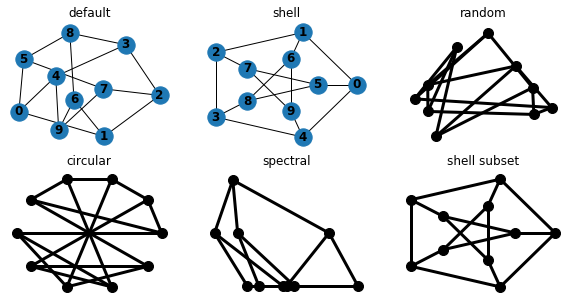

In [179]:
plt.figure(figsize=(10,5))

G = nx.petersen_graph()

options = {
     'node_color': 'black',
     'node_size': 100,
     'width': 3,
}

plt.subplot(231)
nx.draw(G, with_labels=True, font_weight='bold')
plt.title('default')

plt.subplot(232)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.title('shell')

plt.subplot(233)
nx.draw_random(G, **options)
plt.title('random')

plt.subplot(234)
nx.draw_circular(G, **options)
plt.title('circular')

plt.subplot(235)
nx.draw_spectral(G, **options)
plt.title('spectral')

plt.subplot(236)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
plt.title('shell subset')

plt.show()

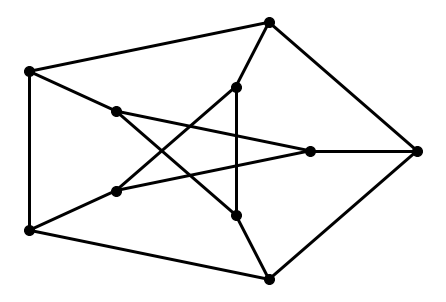

In [184]:
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
plt.savefig("../tmp/path.png")